In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
mcu = pd.read_csv("./data/mcu.csv")

## Analyzing Line Count Distributions

### Line Count by Movie (alphabetical)

In [3]:
line_count = pd.DataFrame(mcu.groupby(["movie","character"]).line.nunique())
line_count.reset_index(inplace=True)
line_count = line_count.pivot(index="character", columns="movie", values="line")
line_count.fillna(0, inplace=True)
line_count["total"] = line_count.sum(axis=1)
line_count = line_count.astype("int64")
line_count

movie,Avengers Endgame,Guardians of the Galaxy Vol. 2,Iron Man,The Avengers,Thor: Ragnarok,total
character,,,,,,
A1 CLINT BARTON,1,0,0,0,0,1
A1 HULK,2,0,0,0,0,2
A1 NATASHA,2,0,0,0,0,2
A1 STEVE,8,0,0,0,0,8
A1 THOR,6,0,0,0,0,6
A1 TONY,3,0,0,0,0,3
ABU,0,0,5,0,0,5
ACTOR LOKI,0,0,0,0,11,11
ACTOR ODIN,0,0,0,0,3,3


### Line Count by Movie (total line count)

In [4]:
line_count.sort_values(by="total", ascending=False)

movie,Avengers Endgame,Guardians of the Galaxy Vol. 2,Iron Man,The Avengers,Thor: Ragnarok,total
character,,,,,,
TONY STARK,163,0,310,170,0,643
THOR,76,0,0,47,343,466
STEVE ROGERS,131,0,0,127,0,258
BRUCE BANNER,103,0,0,86,66,255
PETER QUILL,10,210,0,0,0,220
ROCKET,59,139,0,0,0,198
NATASHA,74,0,0,101,3,178
PEPPER POTTS,16,0,124,30,0,170
LOKI,1,0,0,74,88,163


,total
count,186.000000
mean,26.758065
std,71.731787
min,1.000000
25%,1.000000
50%,4.000000
75%,15.750000
max,643.000000


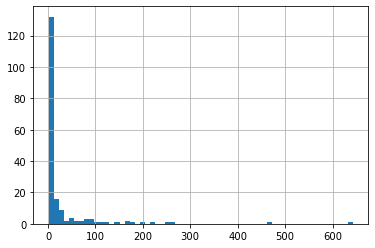

In [5]:
line_count['total'].hist(bins=60)
pd.DataFrame(line_count['total']).describe()

## Analyzing Word Count Distributions

,words
count,5044.000000
mean,10.236915
std,10.598077
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
max,142.000000


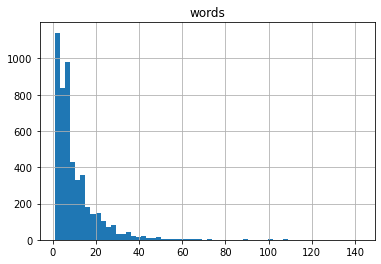

In [6]:
mcu.hist(column="words", bins=60)
pd.DataFrame(mcu["words"]).describe()

We might want to threshold these examples at a given number of words because it's hard to predict who said what line when the line only has few words.  The cell below provides a variable `threshold` and a table that shows how many examples are above / below the threshold number of words for each character.

In [14]:
threshold = 10

above_threshold = mcu["words"] >= threshold

mcu_high_word_count = mcu[above_threshold]
mcu_low_word_count = mcu[~above_threshold]

high_word_line_count = pd.DataFrame(mcu_high_word_count.groupby("character").line.nunique())
low_word_line_count = pd.DataFrame(mcu_low_word_count.groupby("character").line.nunique())

word_count_table = high_word_line_count.join(low_word_line_count, how='outer', lsuffix=' high word count', 
                                             rsuffix=' low word count')
word_count_table.fillna(0, inplace=True)
word_count_table.columns = ["lines above threshold", "lines below threshold"]
word_count_table['total lines'] = word_count_table.sum(axis=1)
word_count_table['% lines above threshold'] = word_count_table['lines above threshold'] / word_count_table['total lines']
word_count_table['% lines below threshold'] = word_count_table['lines below threshold'] / word_count_table['total lines']
word_count_table = word_count_table.astype({'lines above threshold': "int64", 
                                            'lines below threshold': "int64",
                                            'total lines': "int64"})
word_count_table.sort_values(by='total lines', inplace=True, ascending=False)
word_count_table['total words'] = mcu.groupby(by="character").sum()['words']

word_count_table

,lines above threshold,lines below threshold,total lines,% lines above threshold,% lines below threshold,total words
character,,,,,,
TONY STARK,280,362,642,0.436137,0.563863,7600
THOR,170,295,465,0.365591,0.634409,4926
STEVE ROGERS,74,184,258,0.286822,0.713178,2211
BRUCE BANNER,99,152,251,0.394422,0.605578,2623
PETER QUILL,79,141,220,0.359091,0.640909,2078
ROCKET,64,134,198,0.323232,0.676768,1886
NATASHA,64,114,178,0.359551,0.640449,1613
PEPPER POTTS,53,117,170,0.311765,0.688235,1483
LOKI,67,95,162,0.413580,0.586420,1745


## Correlation Between Word Count and Line Count

I wonder if there's any correlation between a character's `mean_word_count` and their `total_line_count`.  

**In other words, do characters with more lines have longer lines?**

Let's also correlate using `log(total_line_count)` because most characters have very few lines, but some characters have a higher number of lines.  This might make it clearer to see if there's a relationship.

In [8]:
mean_word_count = mcu.groupby('character')['words'].mean()
total_line_count = mcu.groupby('character').line.nunique()

word_line_distribution = pd.DataFrame([mean_word_count, total_line_count]).transpose()
word_line_distribution.columns = ['mean word count', 'total line count']
word_line_distribution['log(total line count)'] = np.log10(word_line_distribution['total line count'])

word_line_distribution.corr(method='pearson')

,mean word count,total line count,log(total line count)
mean word count,1.000000,0.137282,0.329994
total line count,0.137282,1.000000,0.699299
log(total line count),0.329994,0.699299,1.000000


There appears to be little correlation between `mean_word_count` and both `total_line_count` and `log(total_line_count)` (`0.137282` and `0.699299` respectively).

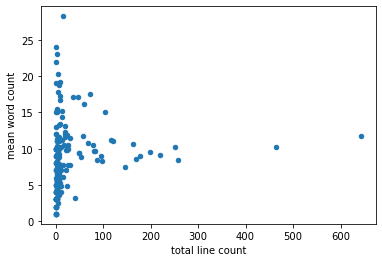

In [9]:
word_line_distribution.plot.scatter(x='total line count', y='mean word count')

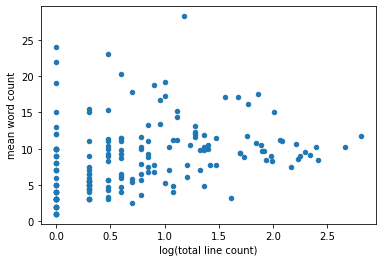

In [10]:
word_line_distribution.plot.scatter(x='log(total line count)', y='mean word count')